In [2]:
import chess
import chess.engine
import random
import numpy

In [20]:
def random_board(max_depth=200):
    board = chess.Board()
    depth = random.randrange(0,max_depth)

    for _ in range(depth):
        all_moves = list(board.legal_moves)
        random_move = random.choice(all_moves)
        board.push(random_move)
        if board.is_game_over():
            break
    return board

def stockfish(board, depth):
  with chess.engine.SimpleEngine.popen_uci('/content/stockfish') as sf:
    result = sf.analyse(board, chess.engine.Limit(depth=depth))
    score = result['score'].white().score()
    return score



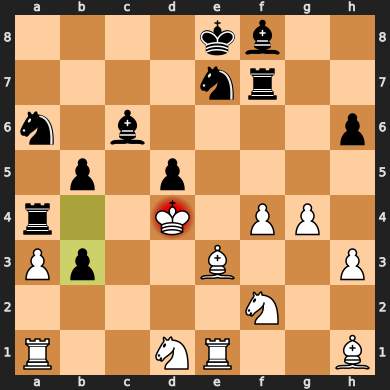

In [11]:
board = random_board()
board

In [21]:
print(stockfish(board,10))

FileNotFoundError: [WinError 2] The system cannot find the file specified